In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
#removing outliers from training dataset
def remove_outliers_iqr(data, columns):

    data_cleaned = data.copy()

    for column in columns:
        q1 = data_cleaned[column].quantile(0.25)
        q3 = data_cleaned[column].quantile(0.75)

        IQR = q3 - q1
        upper_limit = q3 + 1.5 * IQR
        lower_limit = q1 - 1.5 * IQR

        data_cleaned = data_cleaned[((data_cleaned[column] >= lower_limit) & (data_cleaned[column] <= upper_limit))]

    return data_cleaned

separating deaths columnn to into csv


In [12]:
x = pd.read_csv('../dataset/train_data_covid.csv')

In [13]:
x

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,OxygenTanks,PopulationDensityPerSqKm
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,8262,867
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,9136,61
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,3826,316
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,9789,806
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,882,369
...,...,...,...,...,...,...,...,...,...,...,...
14996,14997,2021-05-17,8:00 AM,Lakshadweep,-,-,3633,14,4767,4046,490
14997,14998,2021-05-17,8:00 AM,Madhya Pradesh,-,-,629741,6992,731385,1195,595
14998,14999,2021-05-17,8:00 AM,Maharashtra,-,-,4826371,81486,5378452,9289,195
14999,15000,2021-05-17,8:00 AM,Manipur,-,-,32674,578,39729,576,296


In [14]:
y = pd.read_csv('../dataset/test_data_covid.csv')

In [6]:
#data analysis
number_of_weeks_training = len(x['Date'].unique()) / 7
print("Available data for Training (weeks) =", number_of_weeks_training)


Available data for Training (weeks) = 67.71428571428571


In [7]:
x_train_abs = x[["Date","State/UnionTerritory", "Cured", "Confirmed", "OxygenTanks", "PopulationDensityPerSqKm"]]


In [8]:
#columns for outlier removal
columns = ["Date","Cured", "Confirmed", "OxygenTanks", "PopulationDensityPerSqKm"]

In [9]:
x_train_cleaned = remove_outliers_iqr(x_train_abs, columns)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
x_train_cleaned

,Date,State/UnionTerritory,Cured,Confirmed,OxygenTanks,PopulationDensityPerSqKm
0,30012020,Kerala,0,1,8262,867
1,31012020,Kerala,0,1,9136,61
2,1022020,Kerala,0,2,3826,316
3,2022020,Kerala,0,3,9789,806
4,3022020,Kerala,0,3,882,369
...,...,...,...,...,...,...
14991,17052021,Jammu and Kashmir,189836,244608,5467,595
14995,17052021,Ladakh,14741,16452,5849,773
14996,17052021,Lakshadweep,3633,4767,4046,490
14999,17052021,Manipur,32674,39729,576,296


In [ ]:
y

,Deaths
0,0
1,0
2,0
3,0
4,0
...,...
14996,14
14997,6992
14998,81486
14999,578


In [ ]:
# Remove outliers from x_train_abs
x_train_cleaned = remove_outliers_iqr(x_train_abs, columns)

# Remove the same number of rows from y as were removed from x_train_abs
y_cleaned = y.iloc[x_train_cleaned.index]

In [ ]:
y_cleaned

,Deaths
0,0
1,0
2,0
3,0
4,0
...,...
14991,3149
14995,165
14996,14
14999,578


In [10]:
from sklearn.preprocessing import LabelEncoder
#using label encoding
label_encoder = LabelEncoder()
x_train_cleaned['State/UnionTerritory'] = label_encoder.fit_transform(x_train_cleaned['State/UnionTerritory'])

print(x_train_cleaned)

NameError: name 'x_train_cleaned' is not defined

In [117]:
x_train_cleaned = x_train_cleaned.astype(np.float32)

In [118]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x_train_cleaned,y_cleaned,
                                               test_size=0.33,
                                               random_state=50)

In [119]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [120]:
# Reshape X_train and X_test to have a time_steps dimension of 1
X_train_re = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_re = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [121]:
# Reshape X_train and X_test to have a time_steps dimension of 1
#X_train_re = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
#X_test_re = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
n_features = len(x.columns) - 1  # All features excluding death column

# Assuming timesteps is the number of past time steps to consider
timesteps = X_train.shape[1]

In [179]:
from tensorflow.keras.losses import MeanAbsolutePercentageError

model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(1, X_train_re.shape[2])))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=1))



In [180]:

# Compile and train the model as before
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse")

In [181]:
model.fit(X_train_re, y_train, epochs=10, batch_size=32, validation_data=(X_test_re, y_test))

Epoch 1/10
243/256 [===========================>..] - ETA: 0s - loss: 2010303.2500

ValueError: Data cardinality is ambiguous:
  x sizes: 2754
  y sizes: 4024
Make sure all arrays contain the same number of samples.

In [130]:
model.save('covid_model.h5')

In [131]:
y_pred = model.predict(X_test_re)

126/126 [==============================] - 1s 5ms/step


In [132]:
y_pred

array([[  66.697716],
       [  37.932957],
       [1770.6832  ],
       ...,
       [  67.711006],
       [ 123.77241 ],
       [ 246.72667 ]], dtype=float32)

In [133]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Percentage Error (MAPE): 3.3824769784430364e+16


In [134]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('covid_model.h5')

In [155]:
x_test_data = pd.read_csv("/content/test_covid.csv")

In [156]:
x_test_data

,Sno,Date,Time,State/UnionTerritory,Cured,Confirmed,OxygenTanks,PopulationDensityPerSqKm
0,15001,17 05 2021,8:00 AM,Meghalaya,18478,23332,191,514
1,15002,17 05 2021,8:00 AM,Mizoram,6687,8829,1111,563
2,15003,17 05 2021,8:00 AM,Nagaland,13767,18076,9896,577
3,15004,17 05 2021,8:00 AM,Odisha,514532,612224,6091,615
4,15005,17 05 2021,8:00 AM,Puducherry,65689,84506,220,573
...,...,...,...,...,...,...,...,...
3105,18106,11 08 2021,8:00 AM,Telangana,638410,650353,8796,659
3106,18107,11 08 2021,8:00 AM,Tripura,77811,80660,9330,488
3107,18108,11 08 2021,8:00 AM,Uttarakhand,334650,342462,6290,686
3108,18109,11 08 2021,8:00 AM,Uttar Pradesh,1685492,1708812,723,115


In [161]:
x_test_abs = x_test_data[["State/UnionTerritory", "Cured", "Confirmed", "OxygenTanks", "PopulationDensityPerSqKm"]]


In [162]:
#columns for outlier removal
columns = ["Cured", "Confirmed", "OxygenTanks", "PopulationDensityPerSqKm"]

In [164]:
x_test_cleaned = remove_outliers_iqr(x_test_abs, columns)

In [165]:
from sklearn.preprocessing import LabelEncoder
#using label encoding
label_encoder = LabelEncoder()
x_test_cleaned['State/UnionTerritory'] = label_encoder.fit_transform(x_test_cleaned['State/UnionTerritory'])

print(x_test_cleaned)

      State/UnionTerritory    Cured  Confirmed  OxygenTanks  \
0                       23    18478      23332          191   
1                       24     6687       8829         1111   
2                       25    13767      18076         9896   
3                       26   514532     612224         6091   
4                       27    65689      84506          220   
...                    ...      ...        ...          ...   
3105                    32   638410     650353         8796   
3106                    33    77811      80660         9330   
3107                    35   334650     342462         6290   
3108                    34  1685492    1708812          723   
3109                    36  1506532    1534999         5380   

      PopulationDensityPerSqKm  
0                          514  
1                          563  
2                          577  
3                          615  
4                          573  
...                        ...  
3105        

In [176]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Fit the scaler on the training data
scaler = MinMaxScaler()
scaler.fit(x_test_cleaned)

# Scale the training data
X_test_scaled = scaler.transform(x_test_cleaned)

# Reshape the test data to match the model input shape
X_test_re = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [177]:
X_test_re

array([[[0.63888889, 0.00756479, 0.00927821, 0.01891324, 0.50567108]],

       [[0.66666667, 0.00150278, 0.00194354, 0.11097768, 0.55198488]],

       [[0.69444444, 0.00514276, 0.00662006, 0.99009307, 0.56521739]],

       ...,

       [[0.97222222, 0.17011574, 0.17067326, 0.62924047, 0.66824197]],

       [[0.94444444, 0.8646132 , 0.86168363, 0.07215051, 0.12854442]],

       [[1.        , 0.77260594, 0.7737804 , 0.53817672, 0.60964083]]])

In [178]:
# Make predictions on the test data
y_pred = model.predict(X_test_re)

InvalidArgumentError: Graph execution error:

Detected at node sequential_4/lstm_8/while/lstm_cell/MatMul defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-168-9a616e5ffce1>", line 15, in <cell line: 15>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2655, in predict

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/base_rnn.py", line 556, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/lstm.py", line 626, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5168, in rnn

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5147, in _step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/lstm.py", line 624, in step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/lstm.py", line 327, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 2463, in dot

Matrix size-incompatible: In[0]: [32,5], In[1]: [6,200]
	 [[{{node sequential_4/lstm_8/while/lstm_cell/MatMul}}]] [Op:__inference_predict_function_108123]

In [ ]:
# Create a DataFrame with the predictions
predictions_df = pd.DataFrame(y_pred, columns=['PredictedDeaths'])

# Reset the index to start from 15000
predictions_df.index = range(15000, 15000 + len(predictions_df))

# Create the CSV file
predictions_df.to_csv('predicted_deaths.csv', index=True, header=False)

In [137]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Percentage Error (MAPE): 3.3824769784430364e+16
Mean Squared Error (MSE): 541178.3331483552
Mean Absolute Error (MAE): 343.00684259508256


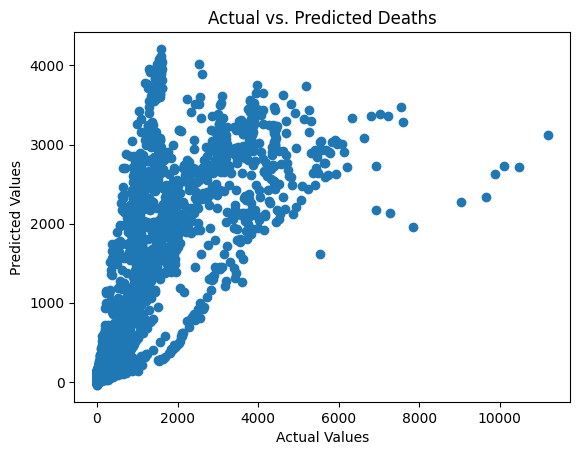

In [138]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Deaths')
plt.show()

In [139]:
import pandas as pd

# Create a DataFrame with the predictions
predictions_df = pd.DataFrame(y_pred, columns=['PredictedDeaths'])

In [140]:
# Add any additional columns from the test data (e.g., 'State/UnionTerritory')
predictions_df['State/UnionTerritory'] = X_test['State/UnionTerritory']

In [141]:
# Create the CSV file
predictions_df.to_csv('predicted_deaths.csv', index=False)

In [142]:
# Add the actual death rates from the test data
predictions_df['ActualDeaths'] = y_test

In [144]:
from tensorflow.keras.models import load_model
import pandas as pd

# Load the trained model
model = load_model('covid_model.h5')

# Scale and reshape the test data
X_test_scaled = scaler.transform(X_test)
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Make predictions on the test data
y_pred = model.predict(X_test_reshaped)

# Create a DataFrame with the predictions
predictions_df = pd.DataFrame(y_pred, columns=['PredictedDeaths'])

# Reset the index to start from 15000
predictions_df.index = range(15000, 15000 + len(predictions_df))

# Create the CSV file
predictions_df.to_csv('predicted_deaths.csv', index=True, header=False)

126/126 [==============================] - 3s 13ms/step
